# BFS(Breadth First Search)

- 그래프를 탐색하는 방법에는 크게 두가지가 있음
  - 깊이 우선 탐색(DFS)
  - 너비 우선 탐색(BFS)

- 너비우선탐색은 탐색 시작점의 인접한 정점들을 먼저 모두 차례로 방문한 후에 방문했던 정점을 시작점으로 하여 다시 인접한 정점들을 차례로 방문하는 방식
- 인접한 정점들에 대해 탐색을 한 후 , 차례로 다시 너비우선탐색을 진행해야하므로, 선입선출 형태의 자료구조인 큐를 활용함


![BFS 예제그래프.PNG](<attachment:BFS 예제그래프.PNG>)


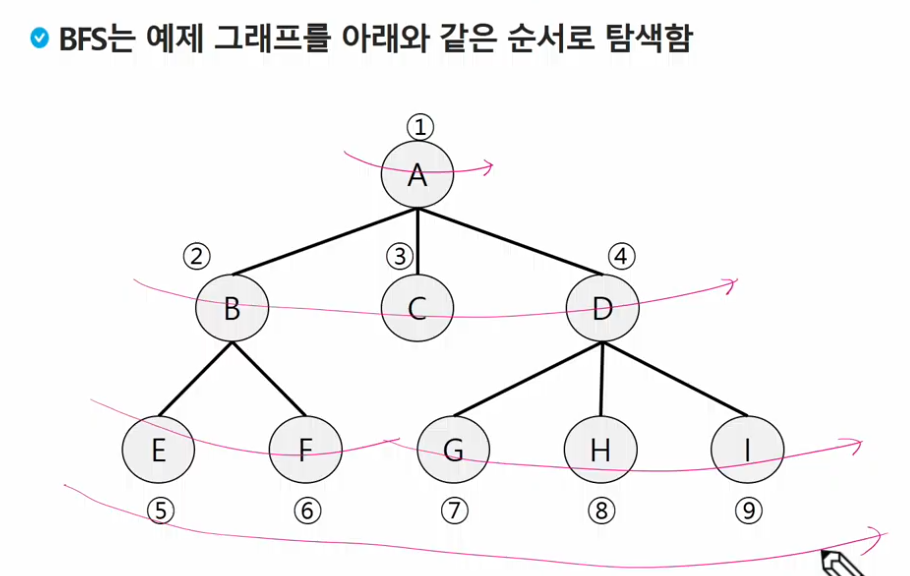

In [1]:
# 준비과정

def BFS(G,v) :      # 그래프 G, 탐색 시작점 v
    visited = [0] * (n+1)       # n : 정점의 개수 # 시작점이 1부터 시작할 때 방문한 정점을 표시할 리스트
    queue = []
    queue.append(v)

# 탐색 과정
    while queue :                               #큐가 비어있지 않은 경우
        t = queue.pop(0)                        #큐의 첫번째 원소 반환
        if not visited[t] :                     #t가 방문하지 않은 곳이라면
            visited[t] = True                   #방문한 것으로 표시
            visit(t)                            #정점 t에서 할 일
            for i in G[t] :                     #t와 연결된 모든 정점에 대해
                if not visited[i]:              #방문되지 않은 곳이라면
                    queue.append(i)             #큐에 넣기 -> 무향그래프라서 A도 B의 인접. A가 다시 들어가지 않도록
                                                #이 과정이 없으면 중복으로 들어가서 q사이즈 예측이 어렵다
                                                #일단 넣은 뒤 꺼낼 때 if로 걸러도 되지만 그러면 q 사이즈 예측이 어려워진다

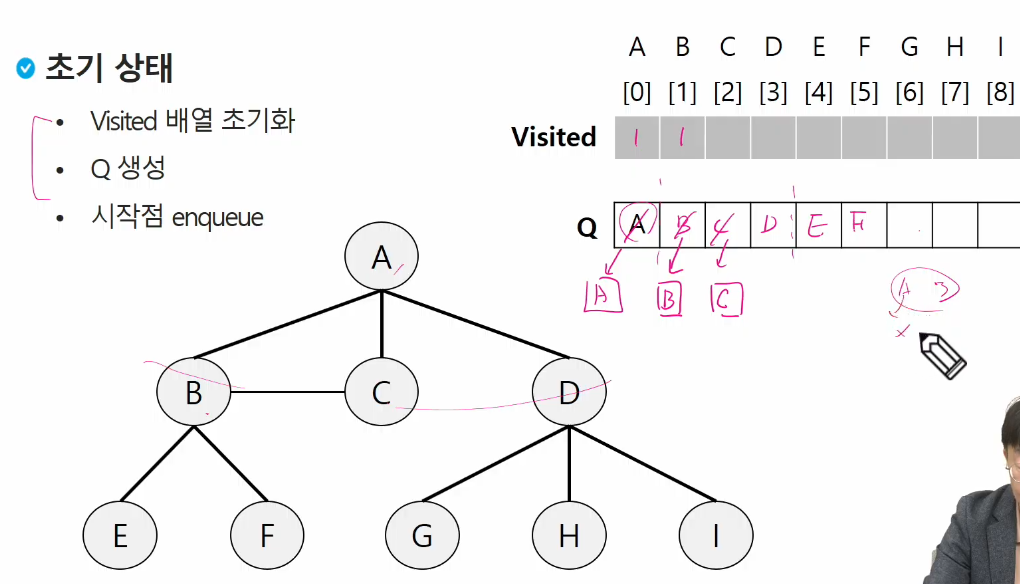
- 만약 접접에 여러가지 간선으로 접근할 수 있다면, 더 가까운 접점 기준으로 처리됨
- 위와 같은 경우 B를통해 가면 2번 거쳐가야하므로 A일때 먼저 처리됨

</br>

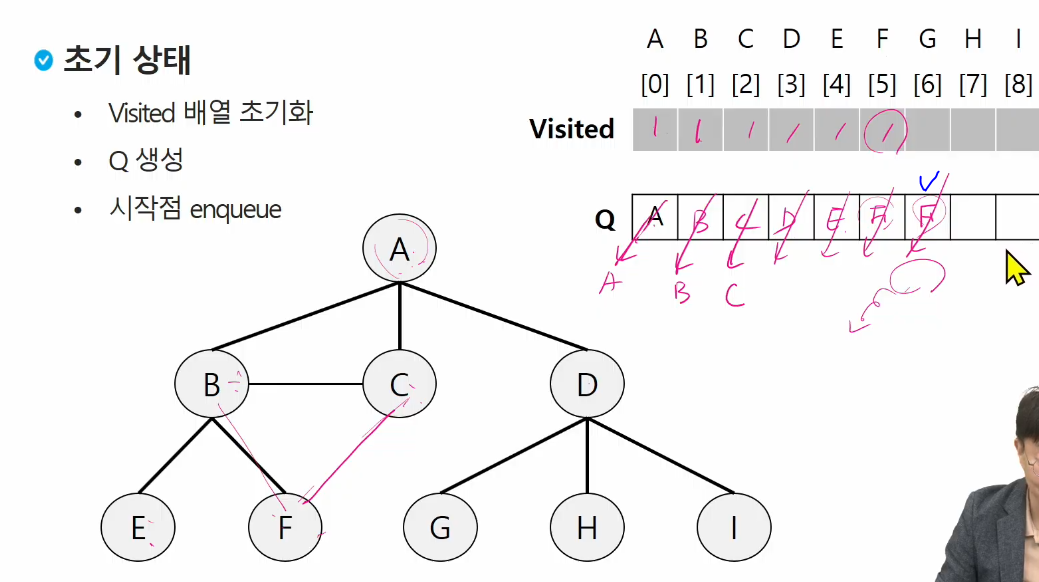
- C를 처리할 때 F가 두번 처리될 수 있으므로 위에서 넣을 때, 뺄 때 모두 visited를 체크함
  -> if 두번 비효율적이지 않나!? -> 애초에 q에 중복이 안되게 한다면? - 참고부분!

In [2]:
def BFS(G,v,n) :      # 그래프 G, 탐색 시작점 v
    visited = [0] * (n+1)       # n : 정점의 개수 # 시작점이 1부터 시작할 때 방문한 정점을 표시할 리스트
    queue = []                  #큐 생성
    queue.append(v)             #시작점 v를 큐에 삽입
    visited[v] = 1              #인큐됨 표시

    while queue :               #큐가 비어있지 않은 경우
        t = queue.pop(0)        #큐의 첫번째 원소 반환
        visit(t)                #정점에서 할 일
        for i in G[t] :                     #t와 연결된 모든 정점에 대해
            if not visited[i]:              #방문되지 않은 곳이라면(q에 없으면) 대기시킴
                queue.append(i)             #큐에 넣기
                visited[i] = visited[t] + 1 #n으로부터 1만큼 이동

In [3]:
'''
7 8     #정점수, 간선 수
4 2 1 2 1 3 5 2 4 6 5 6 6 7 3 7     #연결 상태
'''

def bfs(s, V):  # 시작정점 s, 마지막 정점 V
    visited = [0] * (V+1)   # visited 생성
    q = []          # 큐 생성
    q.append(s)     # 시작점 인큐
    visited[s] = 1  # 시작점 방문(인큐됨)표시
    while q:        # 큐에 정점이 남아있으면, 선형큐의 경우 : front != rear
        t = q.pop(0)    # 디큐
        print(t)        # 방문한 정점에서 할일
        for w in adj_l[t]:  # 인접한 정점 중 인큐되지 않은 정점 w가 있으면
            if visited[w]==0:
                q.append(w)     # w인큐, 인큐되었음을 표시
                visited[w] = visited[t] + 1

V, E = map(int, input().split()) # 1번부터 V번 정점, E개의 간선
arr = list(map(int, input().split()))
# 인접리스트 만들기 -------------------------
adj_l = [[] for _ in range(V+1)]    # 0번 정점이 없고 1번부터 시작하므로 V+1
for i in range(E):
    v1, v2 = arr[i*2], arr[i*2+1]
    adj_l[v1].append(v2)
    adj_l[v2].append(v1)    # 방향이 없는 경우라서 서로 저 장해줌
# 여기까지 인접리스트 만들기-----------------

print(visited)  #[0,1,2,2,3,3,4,3]  #탐색 순서 
# 최단 거리를 확인할 수 있음 #최단 거리, 최단 시간, 미로에서 기체가 확산되는 시간, 미로의 최단거리 등을 구할 때 쓸 수 있음
# visited[w] = visited[t] + 1 이게 있어서 가능함
bfs(1, V)       #출발점과 정점수



# 결과 : 1 2 3 4 5 7 6
# 시작점에 따라 다름
# 같은 정점에 연결된 요소는 순서가 바뀔 수 있음

KeyboardInterrupt: Interrupted by user

In [ ]:
#생각 연습
#먼저 적어두고 코드 쓰기

def bfs(s,V) : 
    # 준비
        # visited 생성
        # 큐생성
        # 시작점 인큐 
        # 시작점 방문표시
    # 탐색
        #탐색할 정점이 남아있으면
            #t 디큐
            #처리
            #t에 인접이고 인큐된 적 없으면
            #인큐하고 인큐됨 표시

#### 공부법
30분 풀어도 안되면 답보기 -> 복기 -> 다음날 다시 풀어보기 -> 시간제한 두고 풀어보기(오타탐색포함 20분 이런식으로)

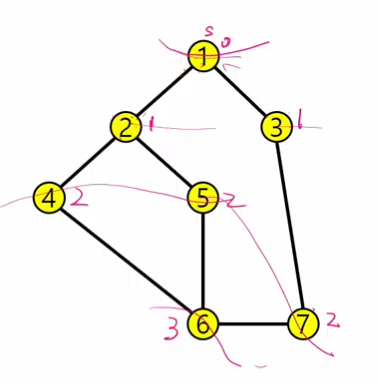

In [ ]:
# 11652 미로의거리 문제

def bfs(i,j,N) :
# 준비
    # visited 생성
    visited = [0] * (N+1)
    # 큐생성
    q = []
    # 시작점 인큐 
    q.append([i,j])
    # 시작점 방문표시
    visited[i][j] = 1

# 탐색
    while q :
        ti,tj = q.pop(0)    #디큐
        if maze[ti][tj] == 3: #visit(t)
            return visited[ti][tj]      #도착
        for di, dj in [[0,1],[1,0],[0,-1],[-1,0]] : #미로 내부 인접 델타
            wi, wj = ti + di, tj + dj
            #wi, wj가 범위 내에 있고, 벽이 아니며, 방문한 적이 없다면 인큐
            if 0 <= wi < N and 0 <= wj <N and maze[wi][wj] != 1 and visited[wi][wj] == 0 :
                q.append([wi,wj])
                visited[wi][wj] = visited[ti][tj] + 1
    return 0    #길이 없을 때
        



def find_start(N) :
    for i in range(N) :
        for j in range(N) :
            if maze[i][j] == 2:
                return i,j


N = int(input())
maze = [list(map(int,input())) for _ in range(N)]

sti,stj = find_start(N)
ans = bfs(sti,stj,N)